In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:

x_train.shape

(50000, 32, 32, 3)

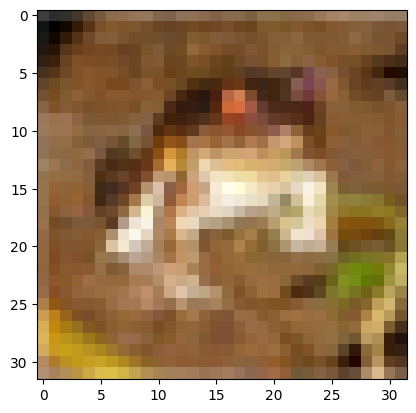

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# ! wget https://www.google.com/url?sa=i&url=https%3A%2F%2Fa-z-animals.com%2Fblog%2F7-animals-bigger-than-an-african-elephant%2F&psig=AOvVaw3bDGlU_L0i5bb5hYfpHmel&ust=1686666120316000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCJi8_on3vf8CFQAAAAAdAAAAABAE -O elephant.jpg

In [ ]:
import cv2 # this package usefule and easy to image

In [ ]:
img = cv2.imread('/content/elephent.webp')

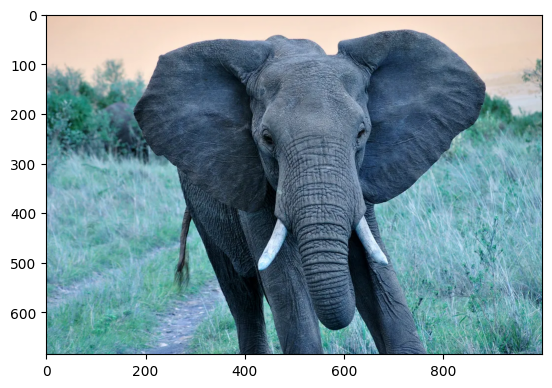

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.resize(img, (224, 224)) # we want to have squaer size

In [ ]:
plt.imshow(img)

In [ ]:
kernel = np.asarray([[-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1],
            ])

kernel2 = np.asarray([[0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0],
            ])

In [ ]:
# we want to convert out code to function : actually we done a filter on img
def Convolve(img, kernel):
    output_size=(img.shape[0] - kernel.shape[0] + 1, img.shape[1] - kernel.shape[1] + 1)
    filtered_img=np.zeros(output_size)
    for i in range(img.shape[0] - kernel.shape[0] + 1):
        for j in range(img.shape[1] - kernel.shape[1] + 1):
            filtered_img[i,j] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
    return filtered_img

In [ ]:
new_img = Convolve(img, kernel)

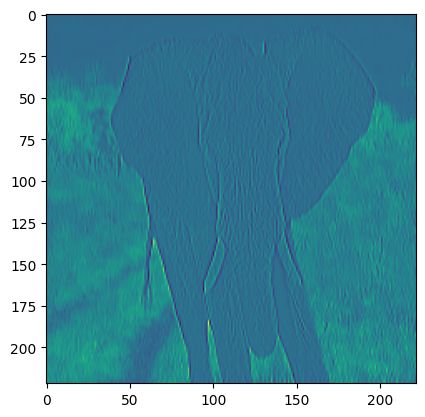

In [ ]:
plt.imshow(new_img) # we see our edge extracted in the image below

In [ ]:
new_img = Convolve(img, kernel2)

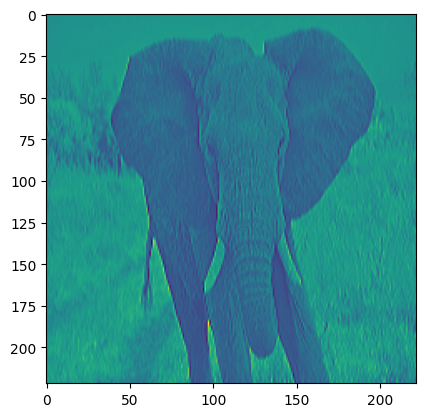

In [ ]:
plt.imshow(new_img) # we see our img is more than sharpe

In [ ]:
 # we want ti implement stride : strike is we take step for convolve
 def Convolve(img, kernel, stride=1):
    output_size=(int(np.ceil((img.shape[0] - kernel.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)  # np.ceil(0.1)=====> 1
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
            filtered_img[ii,jj] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
[i for i in range(20)] # is show that out step is 1 by 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
[i for i in range(0, 20, 2)] # we start from 0 to 20 with 2 by 2

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
[i for i in range(0,20,3)]

[0, 3, 6, 9, 12, 15, 18]

In [ ]:
new_img = Convolve(img, kernel2)

In [ ]:
img.shape, kernel.shape, new_img.shape

((224, 224, 3), (3, 3), (222, 222))

In [ ]:
new_img = Convolve(img, kernel2, stride=2)

In [ ]:
img.shape, kernel.shape, new_img.shape

((224, 224, 3), (3, 3), (111, 111))

In [ ]:
one = np.ones((5, 5)) # make 5*5

In [ ]:
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
zero = np.zeros((one.shape[0]+2, one.shape[1]+2)) # make 7*7

In [ ]:
zero.shape

(7, 7)

In [ ]:
zero # we populate these amount to the Concolve def

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
zero.shape[0]-1

6

In [ ]:
# padding : padding is we do not want our dimenssion be small is mean that we do not want to change our size
 # and our image 1 level up big our size
def Convolve(img, kernel, stride=1, padding=False):
    if padding:
        zero = np.zeros((img.shape[0]+2, img.shape[1]+2))
        zero[1:zero.shape[0]-1, 1:zero.shape[0]-1] = img
        img = zero
    output_size=(int(np.ceil((img.shape[0] - kernel.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
            filtered_img[ii,jj] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
img.shape # our img is 3 chanell we must to convert 1 chanell

(224, 224, 3)

In [ ]:
img[:,:,0].shape

(224, 224)

In [ ]:
new_img = Convolve(img[:,:,0], kernel2, stride=2, padding=True)

In [ ]:
img[:,:,0].shape, new_img.shape

((224, 224), (112, 112))

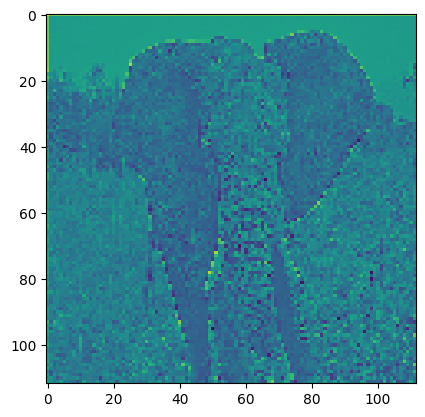

In [ ]:
plt.imshow(new_img) # we assign Filtter

In [ ]:
# Pooling : Pooling is a mathematical mission to summerize information
# MAX pooling going to what pixel is Value max and as a result has a maximum information
# average pooling going to what pixel has a minimumm value
# then is more used max poooling
def MaxPooling(img, size=(2,2), stride=1):
    kernel_size=np.zeros(size)
    output_size=(int(np.ceil((img.shape[0] - kernel_size.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel_size.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel_size.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel_size.shape[1] + 1, stride):
            filtered_img[ii,jj] = np.max(img[i:kernel_size.shape[0]+i, j:kernel_size.shape[1]+j])
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
new_img = MaxPooling(img[:,:,0], size=(2,2), stride=1)

In [ ]:
new_img .shape

(223, 223)

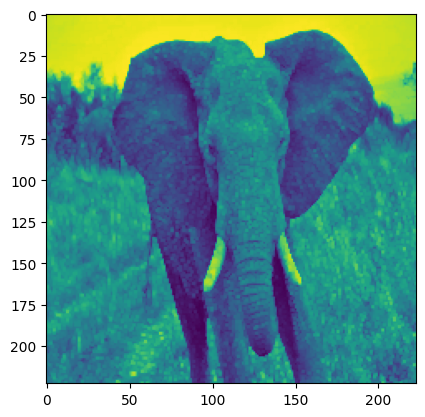

In [ ]:
plt.imshow(new_img) # our img more BOLD

In [ ]:
new_img = MaxPooling(img[:,:,0], size=(2,2), stride=2) # pooling dcrease our information and choice that information are useful

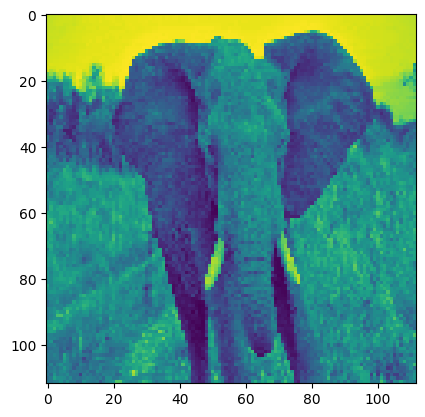

In [ ]:
plt.imshow(new_img)

In [ ]:
# we choose MIN : we compare Max and Minpooling , minpooling is not good
def MinPooling(img, size=(2,2), stride=1):
    kernel_size=np.zeros(size)
    output_size=(int(np.ceil((img.shape[0] - kernel_size.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel_size.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel_size.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel_size.shape[1] + 1, stride):
            filtered_img[ii,jj] = np.min(img[i:kernel_size.shape[0]+i, j:kernel_size.shape[1]+j])
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
new_img = MinPooling(img[:,:,0], size=(2,2), stride=2)

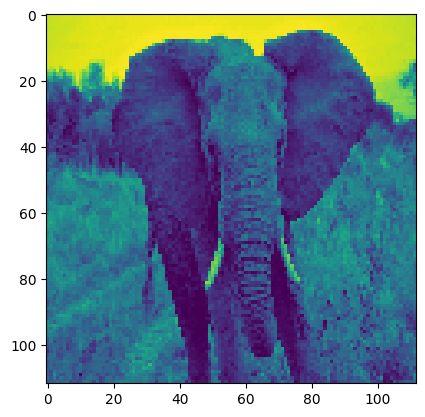

In [ ]:
plt.imshow(new_img)

Convolution Layer

In [ ]:
import numpy as np
import cv2

In [ ]:
img = cv2.imread('/content/elephent.webp')

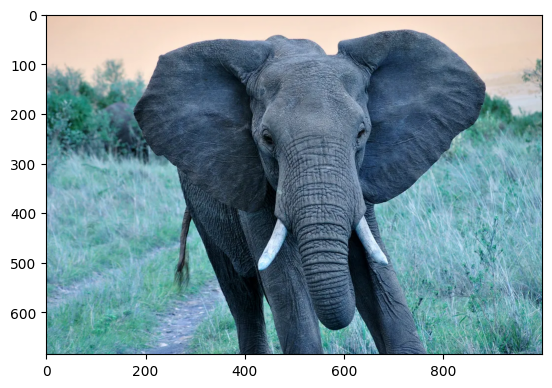

In [ ]:
plt.imshow(img)

In [ ]:
print(img.shape)

(685, 1000, 3)


In [ ]:
def Convolve(img, kernel, stride=1, padding=False):
    if padding:
        zero = np.zeros((img.shape[0]+2, img.shape[1]+2))
        zero[1:zero.shape[0]-1, 1:zero.shape[0]-1] = img
        img = zero
    output_size=(int(np.ceil((img.shape[0] - kernel.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
            filtered_img[ii,jj] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
def MaxPooling(img, size=(2,2), stride=1):
    kernel_size=np.zeros(size)
    output_size=(int(np.ceil((img.shape[0] - kernel_size.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel_size.shape[1] + 1)/stride)))
    filtered_img=np.zeros(output_size)
    ii=0
    jj=0
    for i in range(0, img.shape[0] - kernel_size.shape[0] + 1, stride):
        for j in range(0, img.shape[1] - kernel_size.shape[1] + 1, stride):
            filtered_img[ii,jj] = np.max(img[i:kernel_size.shape[0]+i, j:kernel_size.shape[1]+j])
            jj += 1
        jj = 0
        ii += 1
    return filtered_img

In [ ]:
kernel = np.asarray([[-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1],
            ])
img = cv2.resize(img[:,:,0], (224,224))

In [ ]:
img.shape

(224, 224)

In [ ]:
img_new = Convolve(img, kernel, stride=1, padding=False)

In [ ]:
img_new.shape

(222, 222)

In [ ]:
import matplotlib.pyplot as plt

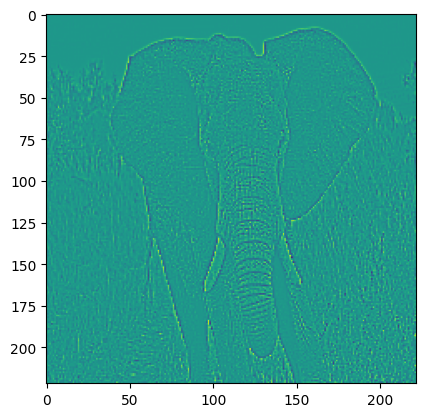

In [ ]:
plt.imshow(img_new)

In [ ]:
img_new2 = Convolve(img_new, kernel, stride=1, padding=False)

In [ ]:
img_new2.shape

(220, 220)

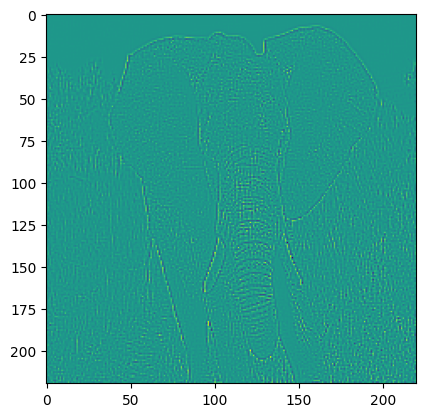

In [ ]:
plt.imshow(img_new2)

In [ ]:
img_new3 = Convolve(img_new2, kernel, stride=1, padding=False)

In [ ]:
img_new3.shape

(218, 218)

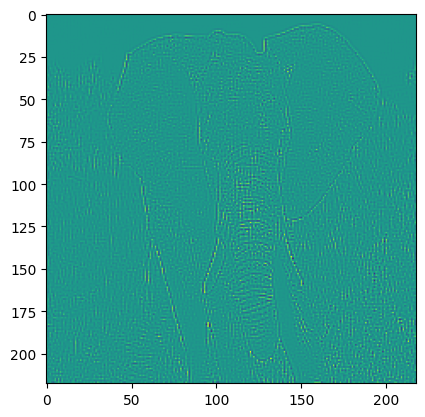

In [ ]:
plt.imshow(img_new3) # for this img concentration is going to edge

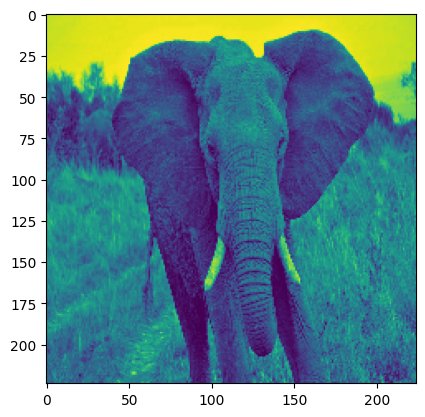

In [ ]:
plt.imshow(img)

In [ ]:
# wthis this case we some filter or kernel but in Neuron we have some weight
# and in AI we have some optimizer come to update our kernel and we do not need kernel as a  defult

In [ ]:
kernel_rand = np.random.uniform(low=-0.5, high=0.5, size=(3,3))

In [ ]:
np.random.uniform(low=-0.5, high=0.5, size=(3,3))

array([[-0.39099826, -0.39369073, -0.04008964],
       [ 0.49177341,  0.01330802,  0.26057169],
       [ 0.47356812, -0.21686241, -0.45966931]])

In [ ]:
img_new = Convolve(img, kernel_rand , stride=1, padding=False)

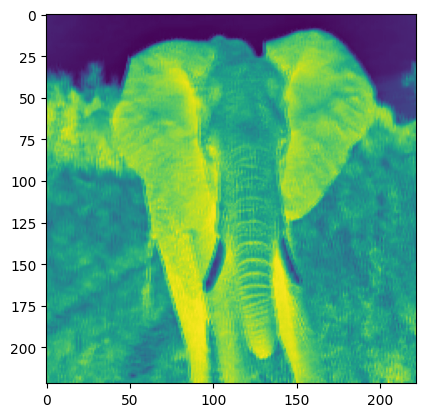

In [ ]:
plt.imshow(img_new) # is not clear and such as negative pictuer

In [ ]:
kernel_rand2 = np.random.uniform(low=-0.5, high=0.5, size=(3,3))

In [ ]:
img_new = Convolve(img, kernel_rand2 , stride=1, padding=False)

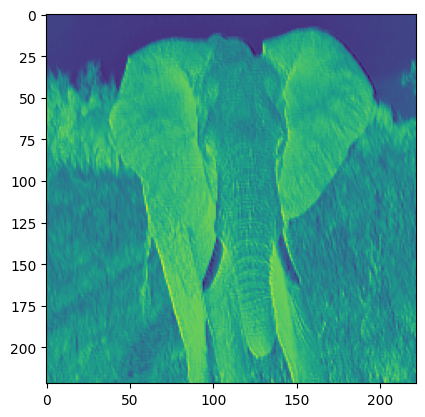

In [ ]:
plt.imshow(img_new)

In [ ]:
# if we want to have visual convolution , we can seat kernel together

In [ ]:
class conv_layer:
    def __init__(self, kernel_count=1, kernel_size=(3,3), stride=1, padding=False):
        self.kernel_count = kernel_count
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.kernels = []
        for i in range(self.kernel_count):
            new_kernel = np.random.uniform(low=-0.5, high=0.5, size=self.kernel_size)
            self.kernels.append(new_kernel)

    def Convolve(self, img, kernel, stride=1, padding=False):
        if padding:
            zero = np.zeros((img.shape[0]+2, img.shape[1]+2))
            zero[1:zero.shape[0]-1, 1:zero.shape[0]-1] = img
            img = zero
        output_size=(int(np.ceil((img.shape[0] - kernel.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel.shape[1] + 1)/stride)))
        filtered_img=np.zeros(output_size)
        ii=0
        jj=0
        for i in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
            for j in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
                filtered_img[ii,jj] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
                jj += 1
            jj = 0
            ii += 1
        return filtered_img

    def forward(self, input):
        self.output = []
        for kernel in self.kernels:
            out = Convolve(img=input, kernel=kernel, stride=self.stride, padding=self.padding)
            self.output.append(out)

        return self.output

In [ ]:
clayer1 = conv_layer(kernel_count=3, kernel_size=(3,3), stride=1, padding=False)

In [ ]:
len(clayer1.kernels)

3

In [ ]:
clayer1.kernels

[array([[ 0.45570186, -0.08278782, -0.46445011],
        [ 0.06367537, -0.24258926, -0.32094833],
        [ 0.26734913, -0.10812115,  0.14242292]]),
 array([[-0.17699463, -0.26704109,  0.3258506 ],
        [ 0.10926048, -0.31969441,  0.29441479],
        [ 0.05657409,  0.46335004, -0.31302313]]),
 array([[ 0.47259225, -0.15217234, -0.42458524],
        [ 0.46218768, -0.36655926, -0.31993086],
        [ 0.1887971 ,  0.4817645 , -0.00103907]])]

In [ ]:
output = clayer1.forward(img)

In [ ]:
len(output)

3

In [ ]:
output[0].shape

(222, 222)

In [ ]:
clayer2 = conv_layer(kernel_count=10, kernel_size=(3,3), stride=1, padding=False) # 10 chanell  ....

In [ ]:
output = clayer2.forward(img)

In [ ]:
len(output) # each kerenr generate one output

10

In [ ]:
# if we have entrans some channel that filter same as chaneel make it and populate nuuber in it
# CNN Multi Channel:
#Featuer Visualization
class conv_layer:
    def __init__(self, kernel_count=1, kernel_size=3, input_channel=None, stride=1, padding=False):
        self.kernel_count = kernel_count
        self.kernel_size = kernel_size
        self.input_channel = input_channel
        self.kernel_shape = (self.kernel_size, self.kernel_size, self.input_channel)
        self.stride = stride
        self.padding = padding
        self.kernels = []
        for i in range(self.kernel_count):
            new_kernel = np.random.uniform(low=-0.5, high=0.5, size=self.kernel_shape)
            self.kernels.append(new_kernel)

    def Convolve(self, img, kernel, stride=1, padding=False):
        if padding:
            zero = np.zeros((img.shape[0]+2, img.shape[1]+2))
            zero[1:zero.shape[0]-1, 1:zero.shape[0]-1] = img
            img = zero
        output_size=(int(np.ceil((img.shape[0] - kernel.shape[0] + 1)/stride)), int(np.ceil((img.shape[1] - kernel.shape[1] + 1)/stride)))
        filtered_img=np.zeros(output_size)
        ii=0
        jj=0
        for i in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
            for j in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
                filtered_img[ii,jj] = (img[i:kernel.shape[0]+i, j:kernel.shape[1]+j] * kernel).sum()
                jj += 1
            jj = 0
            ii += 1
        return filtered_img

    def forward(self, input):
        self.output = []
        for kernel in self.kernels:
            out = Convolve(img=input, kernel=kernel, stride=self.stride, padding=self.padding)
            self.output.append(out)

        self.output = np.asarray(self.output)
        self.output = self.output.reshape((self.output.shape[1], self.output.shape[2], self.output.shape[0]))
        return self.output


In [ ]:
clayer1 = conv_layer(kernel_count=3, kernel_size=3,input_channel=1, stride=1, padding=False)

In [ ]:
clayer1.kernels[0].shape

(3, 3, 1)

In [ ]:
output1 = clayer1.forward(img)

In [ ]:
output1.shape

(222, 222, 3)

In [ ]:
clayer2 = conv_layer(kernel_count=10, kernel_size=3,input_channel=3, stride=1, padding=False)

In [ ]:
clayer2.kernels[0].shape

(3, 3, 3)

In [ ]:
output2 = clayer2.forward(output1)

In [ ]:
output2.shape

(220, 220, 10)

In [ ]:
clayer3 = conv_layer(kernel_count=15, kernel_size=5,input_channel=10, stride=1, padding=False)
output3 = clayer3.forward(output2)


In [ ]:
output3.shape

(216, 216, 15)

In [ ]:
# as you see oue size smallest and our goal is that just usefil information save and abstract just useful for us

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = np.reshape(x_train, [-1, 32*32*3])
x_test = np.reshape(x_test, [-1, 32*32*3])
x_train = x_train/255.
x_test = x_test/255.
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(3072, )))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 924910 (3.53 MB)
Trainable params: 924910 (3.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 5s 3ms/step - loss: 1.9075 - accuracy: 0.3244
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7096 - accuracy: 0.3909
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 1.6445 - accuracy: 0.4178
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 1.6058 - accuracy: 0.4289
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5758 - accuracy: 0.4433
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 1.5451 - accuracy: 0.4537
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5288 - accuracy: 0.4592
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 1.5149 - accuracy: 0.4628
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 1.4986 - accuracy: 0.4698
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 1.4844 - accuracy: 0.4754

In [ ]:
# as you see our accuracy is not acceptable for us and is better ti improve our accuracy with use convoloutional layer
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
x_train.shape # we need shape for input_shape

(50000, 32, 32, 3)

In [ ]:
# we want to design a model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
# we develop our model a bit
model.add(Flatten()) #  we want to create oue model as a vector
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
6*6*16  # we take our dimenssion from 3072(model.add(Dense(300, activation='relu', input_shape=(3072, )))) to 572
        # also the number of parameter===> Total params: 2768 we can decrease our dimenssional
        # our Traget in Convolutional Network is derease Dimnssion
        #MaxPooling is to take pixels between black and Value ,take Value and value is Edges and take useful information and decrease dimenssion

576

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 6s 4ms/step - loss: 1.6609 - accuracy: 0.4058
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3576 - accuracy: 0.5246
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.2619 - accuracy: 0.5585
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.1977 - accuracy: 0.5838
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.1511 - accuracy: 0.6014
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1197 - accuracy: 0.6120
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0915 - accuracy: 0.6226
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0681 - accuracy: 0.6312
Epoch 9/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0539 - accuracy: 0.6371
Epoch 10/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0375 - accuracy: 0.6426

In [ ]:
# Note that : we see our accuracy in more than previous model  :(Convolution):Now: accuracy: 0.6410 , (Dense):previous:accuracy: 0.4756

 **Abstraction of featuer map :**

In [ ]:
# as rememmber when we want import featuer like as a below:
# from tenssorflow.keras.models impoer Sequential
# but now we can :
from tensorflow.keras.models import Model

In [ ]:
model.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>

In [ ]:
# we have a access in model to layer:
# A LIST there are all layers
model.layers

In [ ]:
model.layers[2] # we callen no 2 layers

In [ ]:
model.layers[2].name # and this layer has a name =====>  conv2d_1

'conv2d_1'

In [ ]:
model.get_layer('conv2d_1')

In [ ]:
model.get_layer(model.layers[2].name)

In [ ]:
model.get_layer(model.layers[2].name).output

<KerasTensor: shape=(None, 13, 13, 16) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
Model(inputs=model.input, outputs=model.output)

In [ ]:
Model(inputs=model.input, outputs=model.get_layer(model.layers[2].name).output) # as a result we put a out put

In [ ]:
featuer_extractor = Model(inputs=model.input, outputs=model.get_layer(model.layers[2].name).output)

In [ ]:
featuer_extractor .summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
Total params: 2768 (10.81 KB)
Trainable params: 2768 (10.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt


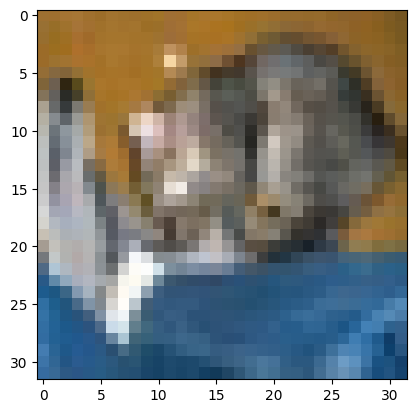

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]  # we can see in cfar10 these number 0., 0., 0., 1., 0., 0., 0., 0., 0., 0 and realize what is the image

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
featuer_extractor.predict(x_train[:1]) # when we use predict that we do not have label and we want to generate label or we want to produce labe and comapayer with the old label

1/1 [==============================] - 0s 211ms/step


array([[[[0.00000000e+00, 1.90090448e-01, 3.26158553e-01, ...,
          0.00000000e+00, 1.87634416e-02, 6.17046833e-01],
         [5.94004989e-04, 1.64602891e-01, 2.19182044e-01, ...,
          0.00000000e+00, 1.10822178e-01, 7.05865860e-01],
         [2.10833568e-02, 1.68626934e-01, 1.63815379e-01, ...,
          0.00000000e+00, 7.04741105e-02, 7.18602538e-01],
         ...,
         [0.00000000e+00, 1.86197490e-01, 1.61287010e-01, ...,
          0.00000000e+00, 1.98727489e-01, 6.67116404e-01],
         [0.00000000e+00, 0.00000000e+00, 9.09722820e-02, ...,
          0.00000000e+00, 1.98299348e-01, 7.99789310e-01],
         [3.73528421e-01, 3.70060652e-03, 2.45504737e-01, ...,
          0.00000000e+00, 2.51401424e-01, 7.25029826e-01]],

        [[1.25650298e-02, 1.37090117e-01, 2.56874323e-01, ...,
          0.00000000e+00, 1.71639979e-01, 6.48666739e-01],
         [7.46787190e-02, 1.23277947e-01, 2.31681228e-01, ...,
          0.00000000e+00, 2.15202272e-01, 5.94324827e-01],
        

In [ ]:
pred = featuer_extractor.predict(x_train[:1])

1/1 [==============================] - 0s 17ms/step


In [ ]:
pred.shape # we see the number of filter ======> (1, 13, 13, 16)

(1, 13, 13, 16)

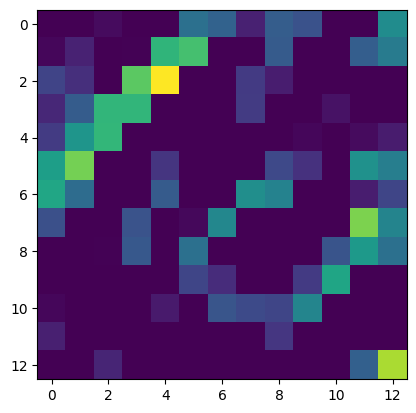

In [ ]:
plt.imshow(pred[0,:,:,0])

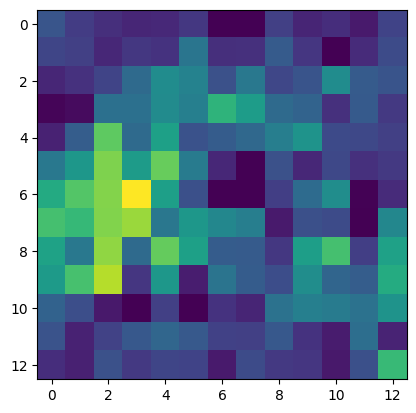

In [ ]:
plt.imshow(pred[0,:,:,2])

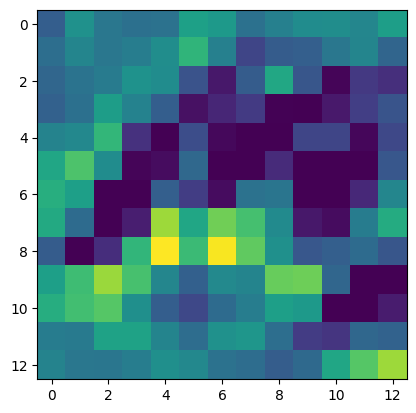

In [ ]:
plt.imshow(pred[0,:,:,11])

In [ ]:
featuer_extractor = Model(inputs=model.input, outputs=model.get_layer(model.layers[0].name).output)

In [ ]:
pred = featuer_extractor.predict(x_train[:1])

1/1 [==============================] - 0s 94ms/step


**Model Evaluation :**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
# if we want to get nigh accuracy ,we should to add layer
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=3, activation='tanh', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(Conv2D(filters=4, kernel_size=3, padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         112       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 4)        

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 15ms/step - loss: 1.8067 - accuracy: 0.3299
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5673 - accuracy: 0.4291
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4682 - accuracy: 0.4642
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3985 - accuracy: 0.4921
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3567 - accuracy: 0.5089
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3181 - accuracy: 0.5254
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2916 - accuracy: 0.5367
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2625 - accuracy: 0.5491
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2353 - accuracy: 0.5621
Epoch 10/10
1563/1563 [==============================] - 23s 14m

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
# we have 3 section and for each section after that we have MaxPooling: Arch & MaxPooling
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5826 - accuracy: 0.4181
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1364 - accuracy: 0.5921
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9270 - accuracy: 0.6715
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8000 - accuracy: 0.7187
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7108 - accuracy: 0.7499
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6493 - accuracy: 0.7724
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5933 - accuracy: 0.7917
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5490 - accuracy: 0.8083
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5071 - accuracy: 0.8206
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

Model Evaluate:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8576 - accuracy: 0.7213


[0.8576139807701111, 0.7213000059127808]

In [ ]:
# validation_split is same the train_test_split useful : istruction below is take 30% and evaluate to 70 % traine
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2745 - accuracy: 0.9021 - val_loss: 0.6626 - val_accuracy: 0.7993
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2617 - accuracy: 0.9085 - val_loss: 0.7170 - val_accuracy: 0.7888
Epoch 3/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2595 - accuracy: 0.9071 - val_loss: 0.7462 - val_accuracy: 0.7887
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2385 - accuracy: 0.9145 - val_loss: 0.8239 - val_accuracy: 0.7720
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2338 - accuracy: 0.9183 - val_loss: 0.8502 - val_accuracy: 0.7823
Epoch 6/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2290 - accuracy: 0.9202 - val_loss: 0.8574 - val_accuracy: 0.7796
Epoch 7/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2166 - accuracy: 0.9237 - val_loss: 0.9059 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
history.history['loss']

[0.27453938126564026,
 0.2617373764514923,
 0.2595456838607788,
 0.23847056925296783,
 0.23379850387573242,
 0.22902841866016388,
 0.2165919989347458,
 0.2225446105003357,
 0.2056300938129425,
 0.2088964283466339]

In [ ]:
history.history['val_loss']

[0.6626362800598145,
 0.7170066833496094,
 0.7462391257286072,
 0.8239237070083618,
 0.8502407670021057,
 0.8573905229568481,
 0.9059022068977356,
 0.9363538026809692,
 1.0708298683166504,
 1.0738720893859863]

<function matplotlib.pyplot.show(close=None, block=None)>

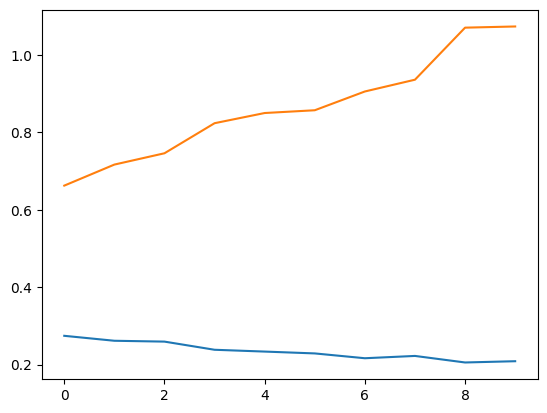

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show
# the blue one is train ans the orange is loss_validation
# and is ahow that overfitting

In [ ]:
# we have learn some technique to avoid a littele bit overfiiting and improve accuracy
# thw technique is that Reqularization

In [ ]:
 from tensorflow.keras.layers import Dropout, BatchNormalization
 from tensorflow.keras import regularizers

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                      

In [ ]:
history_new=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 16s 10ms/step - loss: 1.8528 - accuracy: 0.3079 - val_loss: 1.5495 - val_accuracy: 0.4286
Epoch 2/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.5138 - accuracy: 0.4390 - val_loss: 1.5024 - val_accuracy: 0.4705
Epoch 3/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.3925 - accuracy: 0.4926 - val_loss: 1.3722 - val_accuracy: 0.5118
Epoch 4/10
1094/1094 [==============================] - 10s 10ms/step - loss: 1.2991 - accuracy: 0.5269 - val_loss: 1.3648 - val_accuracy: 0.5180
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.2397 - accuracy: 0.5557 - val_loss: 1.2483 - val_accuracy: 0.5670
Epoch 6/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1903 - accuracy: 0.5737 - val_loss: 1.1918 - val_accuracy: 0.5854
Epoch 7/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1514 - accuracy: 0.5886 - val_loss: 1.0653 - val_a

<function matplotlib.pyplot.show(close=None, block=None)>

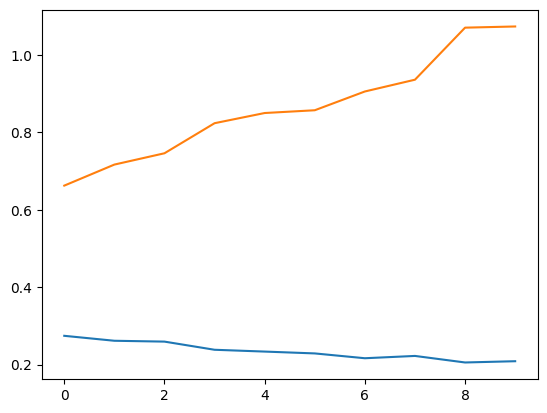

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show

In [ ]:
history2=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0566 - accuracy: 0.6264 - val_loss: 0.9745 - val_accuracy: 0.6566
Epoch 2/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0432 - accuracy: 0.6304 - val_loss: 0.9494 - val_accuracy: 0.6739
Epoch 3/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0237 - accuracy: 0.6375 - val_loss: 1.0303 - val_accuracy: 0.6413
Epoch 4/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0054 - accuracy: 0.6451 - val_loss: 0.9620 - val_accuracy: 0.6680
Epoch 5/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0001 - accuracy: 0.6473 - val_loss: 0.9083 - val_accuracy: 0.6793
Epoch 6/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.9917 - accuracy: 0.6474 - val_loss: 0.9155 - val_accuracy: 0.6803
Epoch 7/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9887 - accuracy: 0.6513 - val_loss: 0.9452 - val_acc

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0886 - accuracy: 0.6290


[1.0885947942733765, 0.6290000081062317]

In [ ]:
loss = history.history['loss'] + history2.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss']

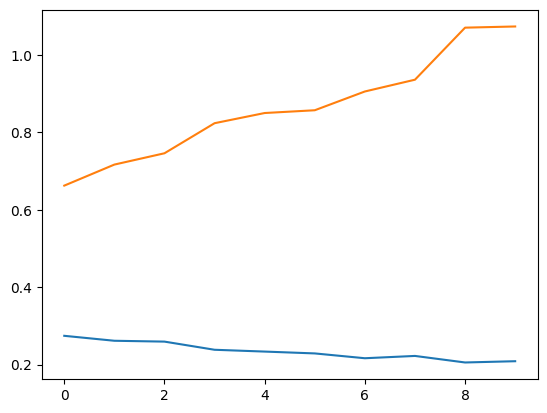

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
 # we can use https://keras.io/api/callbacks/

In [ ]:
# we want to usr batchnorm and L1 L2
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2(), activation='relu'))
# model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2(), activation='relu'))
# model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2(), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                      

In [ ]:
import tensorflow as tf

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
history=model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.3, callbacks=my_callbacks)

Epoch 1/50
1094/1094 [==============================] - 15s 11ms/step - loss: 2.3398 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/50
  13/1094 [..............................] - ETA: 9s - loss: 2.3025 - accuracy: 0.1082

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1094/1094 [==============================] - 10s 9ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0984
Epoch 3/50
1094/1094 [==============================] - 10s 9ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.1025
Epoch 4/50
1094/1094 [==============================] - 11s 10ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/50
1094/1094 [==============================] - 11s 10ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3032 - val_accuracy: 0.1025
Epoch 6/50
1094/1094 [==============================] - 11s 10ms/step - loss: 2.3030 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0984
Epoch 7/50
1094/1094 [==============================] - 11s 10ms/step - loss: 2.3031 - accuracy: 0.0978 - val_loss: 2.3029 - val_accuracy: 0.0984


In [ ]:
# the process was stoped cause : According to the callbach (tf.keras.callbacks.EarlyStopping(patience=5)

In [ ]:
import tensorflow as tf

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=16, kernel_size=3, padding='same'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=16, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 16)        0         
                                                      

In [ ]:
history=model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.3, callbacks=my_callbacks)

Epoch 1/50
1094/1094 [==============================] - 20s 14ms/step - loss: 1.7692 - accuracy: 0.3541 - val_loss: 2.7419 - val_accuracy: 0.2395
Epoch 2/50
1094/1094 [==============================] - 12s 11ms/step - loss: 1.4061 - accuracy: 0.4936 - val_loss: 1.3882 - val_accuracy: 0.5151
Epoch 3/50
1094/1094 [==============================] - 14s 12ms/step - loss: 1.2253 - accuracy: 0.5606 - val_loss: 1.5625 - val_accuracy: 0.5301
Epoch 4/50
1094/1094 [==============================] - 12s 11ms/step - loss: 1.1023 - accuracy: 0.6053 - val_loss: 1.0675 - val_accuracy: 0.6297
Epoch 5/50
1094/1094 [==============================] - 14s 13ms/step - loss: 1.0358 - accuracy: 0.6342 - val_loss: 1.1443 - val_accuracy: 0.6268
Epoch 6/50
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9764 - accuracy: 0.6546 - val_loss: 0.9533 - val_accuracy: 0.6775
Epoch 7/50
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9318 - accuracy: 0.6731 - val_loss: 0.9630 -

In [ ]:
# the data was saved in drive ::::::::::::::::::>>>>

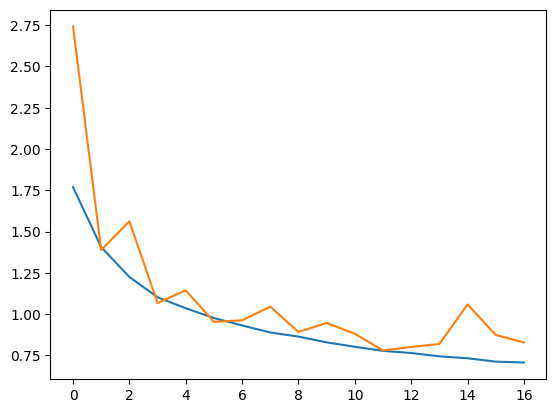

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# our loss be down and after that be overfit

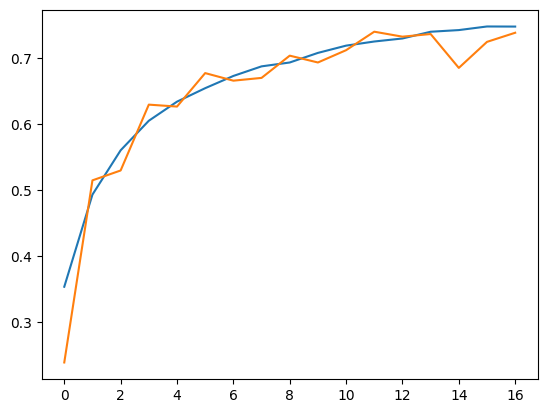

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()